# Statistical distance scale from Buciarelli & Stanghellini (2023)

https://doi.org/10.1051/0004-6361/202347519

https://ui.adsabs.harvard.edu/abs/2023A%26A...680A.104B/abstract

We want to look at the secondary dependence on ionized mass. Is it real, or is it just an effect of the distance uncertainty?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from astroquery.vizier import Vizier
import astropy.units as u
from astropy.table import QTable

In [27]:
sns.set_color_codes()

## Get the catalogs for the paper from Vizier

In [2]:
vizier = Vizier()

In [3]:
vizier.ROW_LIMIT = -1
catalogs = vizier.get_catalogs("J/A+A/680/A104")
catalogs

TableList with 4 tables:
	'0:J/A+A/680/A104/table1' with 11 column(s) and 401 row(s) 
	'1:J/A+A/680/A104/table3' with 15 column(s) and 843 row(s) 
	'2:J/A+A/680/A104/table4' with 11 column(s) and 320 row(s) 
	'3:J/A+A/680/A104/table5' with 11 column(s) and 320 row(s) 

We want Table 1, which has the calibration sample.

In [4]:
tab = QTable(catalogs[0]) 
tab

PNG,GaiaDR3,AName,omegac,e_omegac,theta,logF(Hb),e_logF(Hb),c,e_c,logMi
,,,mas,mas,arcsec,log(mW.m**-2),log(mW.m**-2),,,log(solMass)
str10,int64,str11,float64,float64,float64,float32,float32,float64,float32,float64
000.1+17.2,4130784921205604736,PC12,0.108852,0.081015,1.1245,-11.91,0.00,0.700000,0.10,-1.198275
000.1-05.6,4049045783774253696,H2-40,0.361548,0.326368,8.7950,-13.20,0.40,0.731383,0.10,-1.761370
000.3+12.2,4126115570219432448,IC4634,0.414256,0.052775,5.8150,-10.88,0.01,0.550000,0.06,-1.175168
000.4-02.9,4056250956464755712,M3-19,0.386062,0.230746,3.5000,-12.90,0.20,1.392788,0.10,-2.083465
000.7-03.7,4050168629923554944,M3-22,1.408490,0.365387,3.2000,-12.61,0.01,0.960000,0.10,-3.459038
000.9-02.0,4056540677880158208,Bl3-13,0.188226,0.222946,2.6000,-13.80,0.30,2.225771,0.10,-1.386239
000.9-04.8,4049925328633027712,M3-23,0.266429,0.466980,6.0000,-12.20,0.20,1.034149,0.10,-0.995148
001.7-04.4,4050131349653595392,H1-55,0.073096,1.049650,5.0000,-12.56,0.01,1.141267,0.10,-0.071144


## Calculate distances and nebular radius and extinction-corrected surface brightness

In [5]:
tab["D"] = tab["omegac"].to(u.kpc, equivalencies=u.parallax())
tab["logR"] = np.log10(np.sin(tab["theta"]) * tab["D"].to_value(u.pc))

In [6]:
F = (10**(tab["logF(Hb)"].value + tab["c"])) * u.erg / u.cm ** 2 / u.s
Omega = np.pi * tab["theta"] ** 2

In [7]:
F

<MaskedQuantity [6.16595219e-12, 3.39925066e-13, 4.67735018e-11,
                 3.11020046e-12, 2.23872291e-12, 2.66545165e-12,
                 6.82573134e-12, 3.81299803e-12, 3.18133881e-12,
                 7.62780564e-12, 1.49529328e-11, 1.44543977e-11,
                 3.16227988e-10, 1.65645168e-11, 5.75614611e-12,
                 9.54992502e-11, 5.06152815e-12, 5.41120136e-13,
                 3.06478054e-11, 2.24582506e-13, 2.23871917e-11,
                 2.81838417e-12, 7.84049746e-12, 5.64332915e-13,
                 2.31206377e-12, 5.98626848e-12, 1.92750801e-11,
                 2.12448964e-12, 8.57623770e-14, 1.73779961e-11,
                 4.92170060e-11, 3.80933930e-12, 2.37650646e-11,
                 1.31825674e-11, 6.05278102e-12, 6.23570966e-12,
                 9.12011080e-12, 2.49920568e-12, 4.07380493e-12,
                 3.89045350e-11, 2.43672770e-12, 6.32063920e-13,
                 8.70964202e-11, 9.99999297e-12, 2.66891752e-12,
                 2.566225

In [8]:
Omega

<MaskedQuantity [3.97254470e+00, 2.43008553e+02, 1.06230521e+02,
                 3.84845100e+01, 3.21699088e+01, 2.12371663e+01,
                 1.13097336e+02, 7.85398163e+01, 7.06858347e+00,
                 1.25663706e+01, 9.54978900e+00, 4.30084034e+01,
                 8.47540830e+02, 1.96349541e+01, 2.82743339e+01,
                 5.92829089e+01, 1.47049541e+01, 6.15752160e+00,
                 1.13097336e+02, 4.77836243e+01, 2.62734614e+02,
                 6.55113873e+01, 5.80880482e+01, 1.32732290e+02,
                 3.69836141e+02, 4.07150408e+01, 8.17128249e+01,
                 5.02654825e+01, 5.28101725e+01, 4.51635674e+00,
                 1.38544236e+01, 1.66190251e+01, 3.21699088e+01,
                 1.13411495e+01, 2.12371663e+01, 8.04247719e+00,
                 1.25663706e+01, 3.84845100e+01, 2.74352223e+02,
                 1.49571226e+02, 4.24291723e+01, 7.85398163e+01,
                 5.80880482e+01, 2.64207942e+01, 2.58049038e+01,
                 2.544690

In [9]:
tab["logS(Hb)"] =  np.log10((F / Omega).value)

## Subset with parallax error < 20%

Relative parallax error. Note that table says `omega` when it means `varpi`

In [142]:
tab["sig_p/p"] = tab["e_omegac"] / tab["omegac"]
tab["log(sig_p/p)"] = np.log10(tab["e_omegac"] / tab["omegac"])


In [10]:
m20 = tab["e_omegac"] < 0.2 * tab["omegac"]
m10 = tab["e_omegac"] < 0.1 * tab["omegac"]

In [11]:
tab[m20]

PNG,GaiaDR3,AName,omegac,e_omegac,theta,logF(Hb),e_logF(Hb),c,e_c,logMi,D,logR,logS(Hb)
,,,mas,mas,arcsec,log(mW.m**-2),log(mW.m**-2),,,log(solMass),kpc,,
str10,int64,str11,float64,float64,float64,float32,float32,float64,float32,float64,float64,float64,float64
000.3+12.2,4126115570219432448,IC4634,0.414256,0.052775,5.8150,-10.88,0.01,0.550000,0.06,-1.175168,2.413966,-1.1671,-12.356249425263986
002.0-06.2,4049596604655713664,M2-33,0.283392,0.051525,2.0000,-11.60,0.30,0.482400,0.10,-1.830213,3.528681,-1.4658,-12.216810245491823
002.4+05.8,4111368477921050368,NGC6369,0.962354,0.060272,16.4250,-11.32,0.03,1.820000,0.10,-0.806347,1.039119,-1.0823,-12.42816032398199
002.4-03.7,4050798924999155456,M1-38,0.162975,0.031229,2.5000,-12.01,0.07,1.229179,0.10,-0.928786,6.135910,-1.1286,-12.073851118920045
003.3-04.6,4050854450293755136,Ap1-12,0.157078,0.024909,6.0000,-11.40,0.20,0.886399,0.10,-0.505685,6.366264,-0.7324,-12.567052991991694
009.6+14.8,4141505881131938560,NGC6309,0.408021,0.078305,6.9000,-11.24,0.01,0.830000,0.10,-0.979074,2.450854,-1.0863,-12.584847825286808
010.8-01.8,4094354493205707392,NGC6578,0.412581,0.048524,4.3000,-11.57,0.03,1.510000,0.04,-1.300516,2.423766,-1.2965,-11.824086478677525
011.3-09.4,4078224382749921024,My121,0.256107,0.040689,0.9000,-11.30,0.07,0.709295,0.10,-2.001918,3.904618,-1.7686,-10.996340082307645


## Radius–surface brightness relation

log RPN = (−0.242 ±0.0042) ×log S Hβ−(4.2 ±0.057). 


In [12]:
def logR_logSB_fit(logSB):
    logSB = np.asarray(logSB)
    return -0.242 * logSB - 4.2

This is with all the sources.

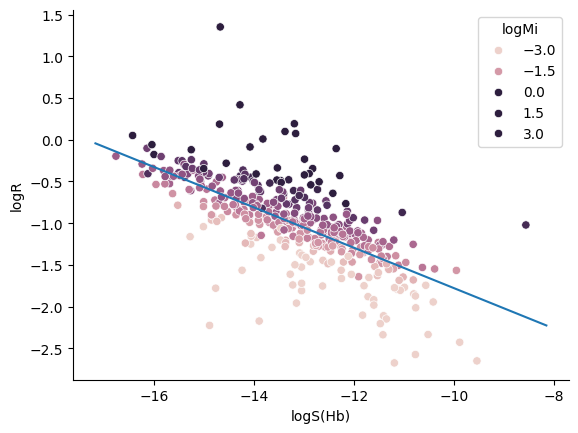

In [13]:
# sns.scatterplot(data=tab[m20].to_pandas(), x="logS(Hb)", y="logR", hue="logMi")
sns.scatterplot(data=tab.to_pandas(), x="logS(Hb)", y="logR", hue="logMi", hue_norm=(-2, 0))
sns.despine()

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.plot(xlim, logR_logSB_fit(xlim))


Just sources with relative parallax error < 20%

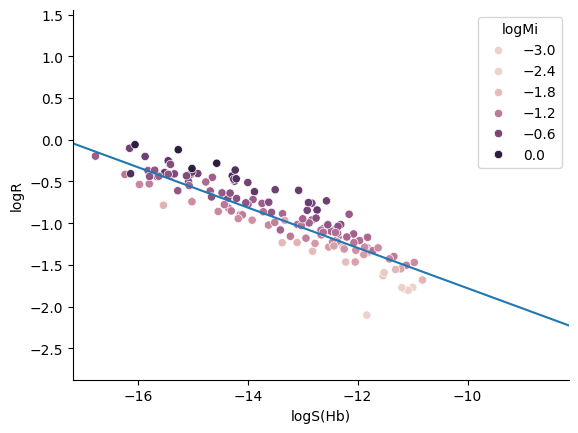

In [14]:
# sns.scatterplot(data=tab[m20].to_pandas(), x="logS(Hb)", y="logR", hue="logMi")
sns.scatterplot(data=tab[m20].to_pandas(), x="logS(Hb)", y="logR", hue="logMi", hue_norm=(-2, 0))
sns.despine()
ax = plt.gca()
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.plot(xlim, logR_logSB_fit(xlim))

Just sources with relative parallax error < 10%

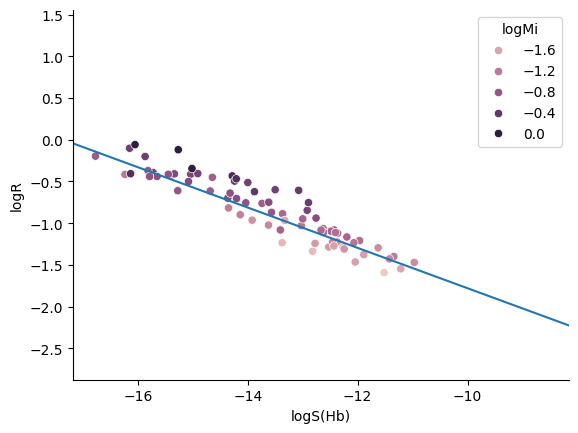

In [15]:
# sns.scatterplot(data=tab[m20].to_pandas(), x="logS(Hb)", y="logR", hue="logMi")
sns.scatterplot(data=tab[m10].to_pandas(), x="logS(Hb)", y="logR", hue="logMi", hue_norm=(-2, 0))
sns.despine()
ax = plt.gca()
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.plot(xlim, logR_logSB_fit(xlim))

## Histogram of ionized mass

<Axes: xlabel='logMi', ylabel='Count'>

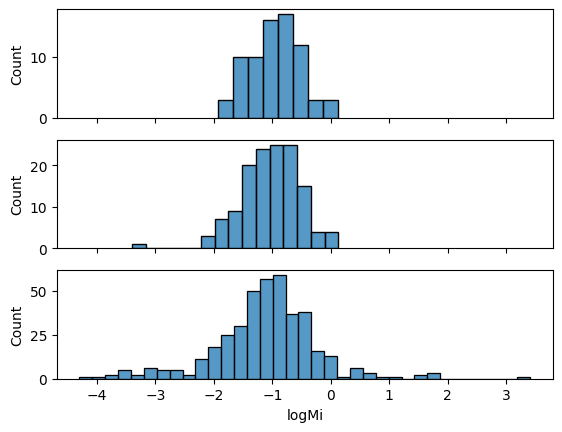

In [16]:
fig, axes = plt.subplots(3, 1, sharex=True)
sns.histplot(data=tab[m10].to_pandas(), x="logMi", ax=axes[0])
sns.histplot(data=tab[m20].to_pandas(), x="logMi", ax=axes[1])
sns.histplot(data=tab.to_pandas(), x="logMi", ax=axes[2])

## Histogram of R / R_fit

In [19]:
tab["d logR"] = tab["logR"] - logR_logSB_fit(tab["logS(Hb)"])

/var/folders/0q/3pcjvc3n6sn2wk6g8ck6ry300000gn/T/ipykernel_48160/1110953106.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


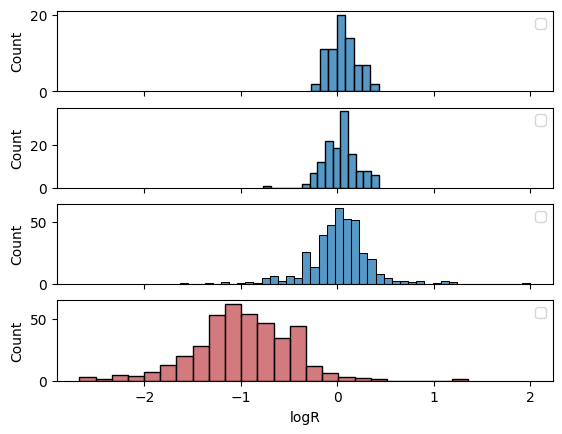

In [29]:
fig, axes = plt.subplots(4, 1, sharex=True)
sns.histplot(data=tab[m10].to_pandas(), x="d logR", ax=axes[0])
sns.histplot(data=tab[m20].to_pandas(), x="d logR", ax=axes[1])
sns.histplot(data=tab.to_pandas(), x="d logR", ax=axes[2])
sns.histplot(data=tab.to_pandas(), x="logR", ax=axes[3], color="r")
for ax in axes:
    ax.legend()

### Deviation in radius versus nominal parallax error



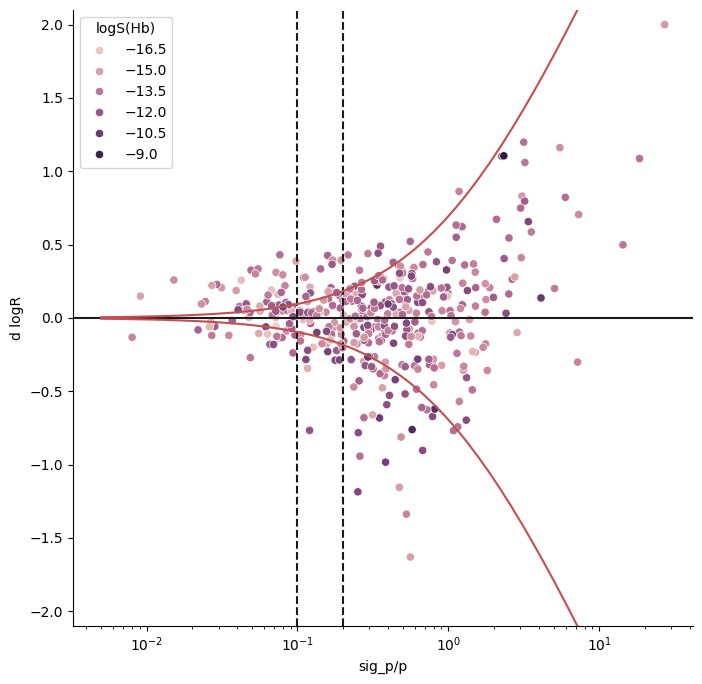

In [154]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=tab.to_pandas(), x="sig_p/p", y="d logR", hue="logS(Hb)", ax=ax)
ax.set_xscale("log")
ax.axhline(0, c="k")
ax.axvline(0.1, c="k", linestyle="dashed")
ax.axvline(0.2, c="k", linestyle="dashed")
xx = np.geomspace(0.005, 20.0)
yy = np.log(1 + xx)
ax.plot(xx, yy, c="r")
ax.plot(xx, -yy, c="r")
ax.set_ylim(-2.1, 2.1)
sns.despine()

## Ionized mass versus deviation from radius--SB trend

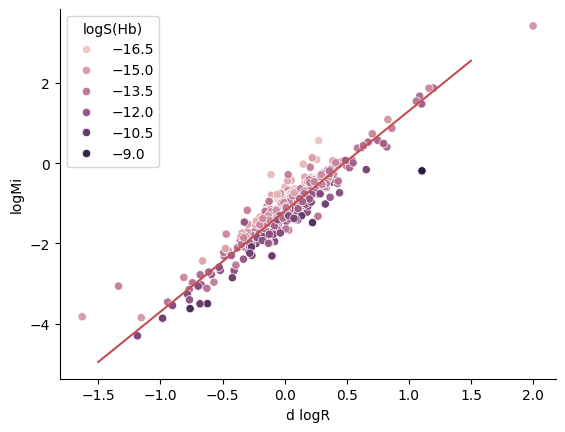

In [161]:
sns.scatterplot(data=tab.to_pandas(), x="d logR", y="logMi", hue="logS(Hb)")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx - 1.2, c="r")
sns.despine()

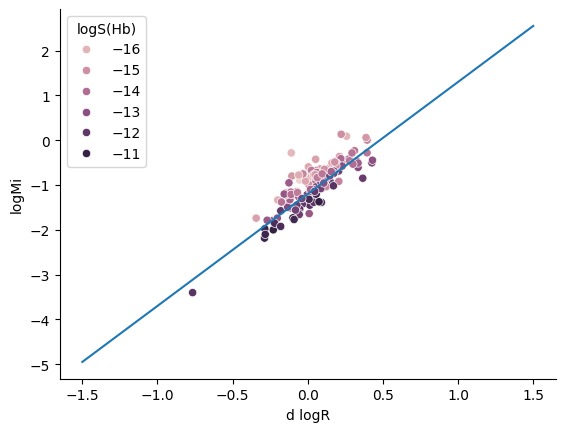

In [39]:
sns.scatterplot(data=tab[m20].to_pandas(), x="d logR", y="logMi", hue="logS(Hb)")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx - 1.2)
sns.despine()


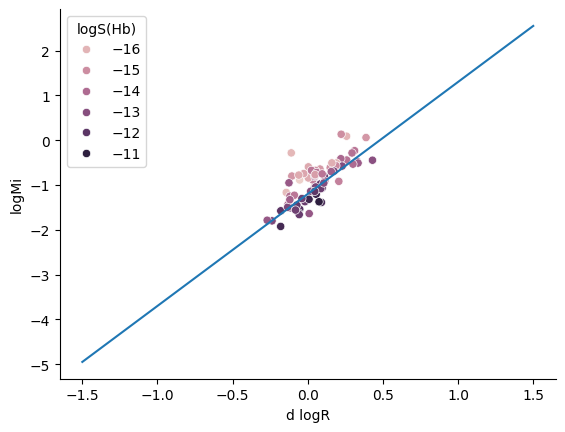

In [38]:
sns.scatterplot(data=tab[m10].to_pandas(), x="d logR", y="logMi", hue="logS(Hb)")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx - 1.2)
sns.despine()


## Fit a mean trend in M_i versus Surface Brightness

In [72]:
def logMi_logSB_fit(SB):
    SB = np.asarray(SB)
    return -1.0 - 0.15 * (SB + 14.0) 

In [73]:
mm = np.abs(tab["d logR"]) < 0.1

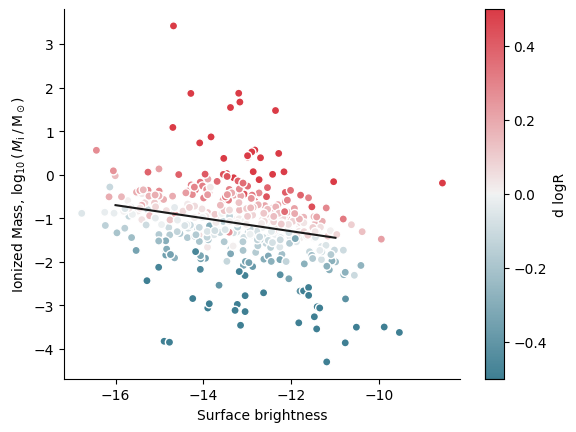

In [160]:
fig, ax = plt.subplots()

points = ax.scatter(
    tab["logS(Hb)"],
    tab["logMi"],
    c=tab["d logR"],
    s=35,
    edgecolors="w",
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    norm=plt.Normalize(-0.5, 0.5),
)

cbar = fig.colorbar(points, ax=ax)
cbar.set_label("d logR")
ax.plot([-16, -11], logMi_logSB_fit([-16, -11]), color="k")
ax.set_xlabel("Surface brightness")
ax.set_ylabel(r"Ionized Mass, $\log_{10} (\, M_\mathrm{i} \, / \,  \mathrm{M_\odot})$")

sns.despine()

## Deviation of M_i from mean trend

In [76]:
tab["d logMi"] = tab["logMi"].value - logMi_logSB_fit(tab["logS(Hb)"])

We want to know whether this can be explained entirely by the uncertainty in the distance.

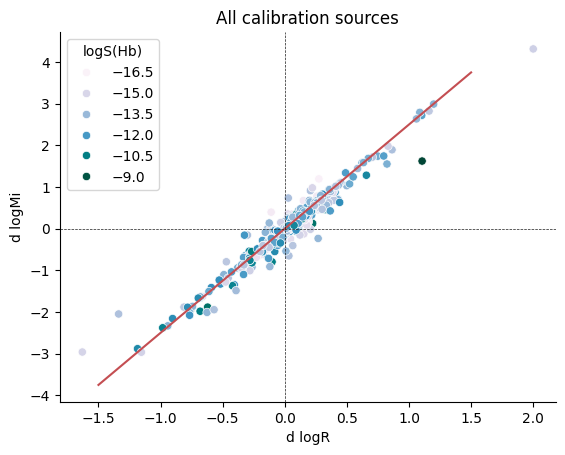

In [163]:
sns.scatterplot(data=tab.to_pandas(), x="d logR", y="d logMi", hue="logS(Hb)", palette="PuBuGn")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx, c="r")
ax.axhline(0, lw=0.5, ls="dashed", c="k")
ax.axvline(0, lw=0.5, ls="dashed", c="k")
ax.set_title("All calibration sources")
sns.despine()

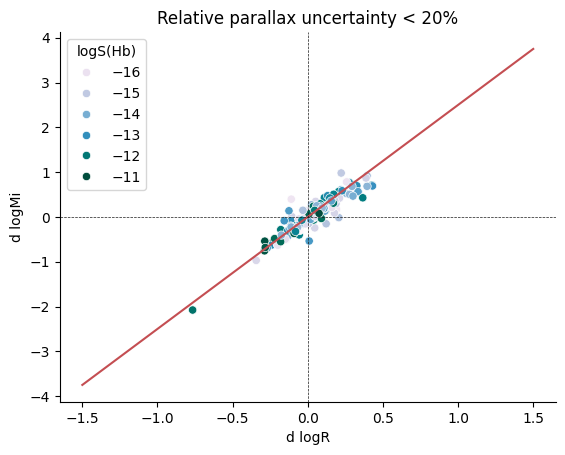

In [119]:
sns.scatterplot(data=tab[m20].to_pandas(), x="d logR", y="d logMi", hue="logS(Hb)", palette="PuBuGn")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx, c="r")
ax.axhline(0, lw=0.5, ls="dashed", c="k")
ax.axvline(0, lw=0.5, ls="dashed", c="k")
ax.set_title("Relative parallax uncertainty < 20%")

sns.despine()

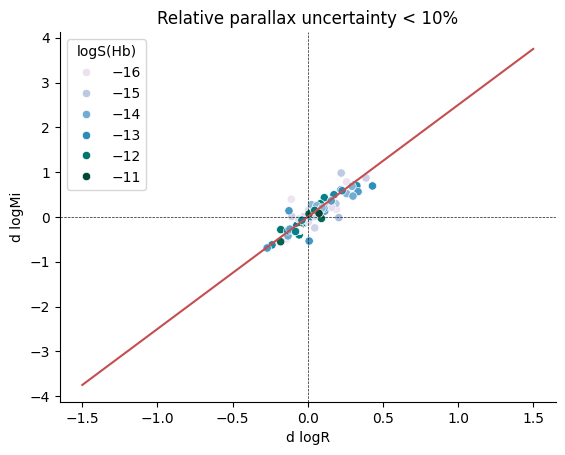

In [120]:
sns.scatterplot(data=tab[m10].to_pandas(), x="d logR", y="d logMi", hue="logS(Hb)", palette="PuBuGn")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx, c="r")
ax.axhline(0, lw=0.5, ls="dashed", c="k")
ax.axvline(0, lw=0.5, ls="dashed", c="k")
ax.set_title("Relative parallax uncertainty < 10%")

sns.despine()

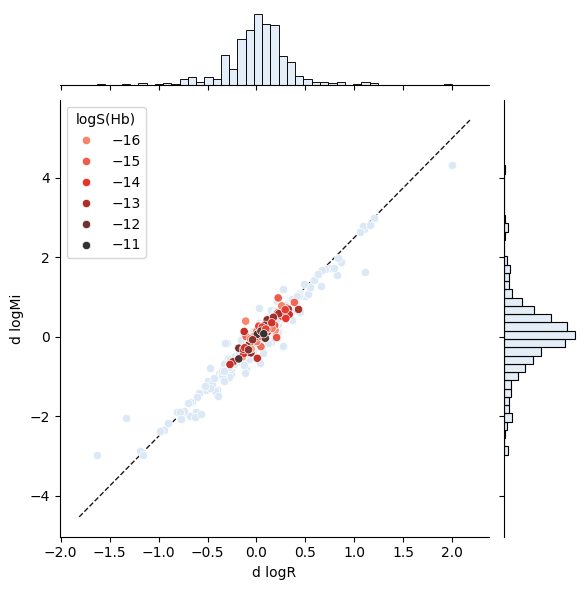

In [172]:
g = sns.jointplot(data=tab.to_pandas(), x="d logR", y="d logMi")
sns.scatterplot(data=tab[m10].to_pandas(), x="d logR", y="d logMi", hue="logS(Hb)", palette="Reds_d", ax=g.ax_joint)
xx = np.array([*g.ax_joint.get_xlim()])
g.ax_joint.plot(xx, 2.5 * xx, c="k", lw=1, ls="dashed", zorder=-1)



In [107]:
sns.choose_colorbrewer_palette("sequential")

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [81]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

In [127]:
tab.to_pandas().describe()

,GaiaDR3,omegac,e_omegac,theta,logF(Hb),e_logF(Hb),c,e_c,logMi,D,logR,logS(Hb),d logR,d logMi,e_p_rel
count,4.010000e+02,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,4.155718e+18,0.474256,0.181472,16.417971,-12.011322,0.132768,0.971685,0.111870,-1.120822,4.942971,-0.985865,-13.206494,0.018163,-0.001796,0.762742
std,1.689088e+18,0.532419,0.260315,34.896956,0.888667,0.135978,0.820351,0.100617,0.894360,7.914043,0.504652,1.392581,0.358286,0.853472,1.961790
min,5.086503e+16,0.009627,0.010693,0.100000,-14.200000,0.000000,-0.476207,0.010000,-4.300743,0.198594,-2.675254,-16.768904,-1.629852,-2.964495,0.008026
25%,3.103708e+18,0.188602,0.048925,2.959500,-12.600000,0.020000,0.386807,0.100000,-1.495334,1.682142,-1.268001,-14.193962,-0.125169,-0.367761,0.134433
50%,4.156238e+18,0.319967,0.085763,6.000000,-12.050000,0.070000,0.790000,0.100000,-1.069767,3.125322,-0.985522,-13.101270,0.036484,0.066966,0.330728
75%,5.794858e+18,0.594480,0.205274,16.000000,-11.460000,0.200000,1.390000,0.100000,-0.675043,5.302171,-0.639014,-12.225286,0.186532,0.416225,0.666483
max,6.907823e+18,5.035410,2.054630,402.000000,-9.370000,0.500000,7.192899,1.200000,3.416269,103.874520,1.353282,-8.567209,2.000190,4.313939,27.150863


In [130]:
sns.boxplot?

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

See the :ref:`tutorial <categorical_tutorial>` for more i

<Axes: >

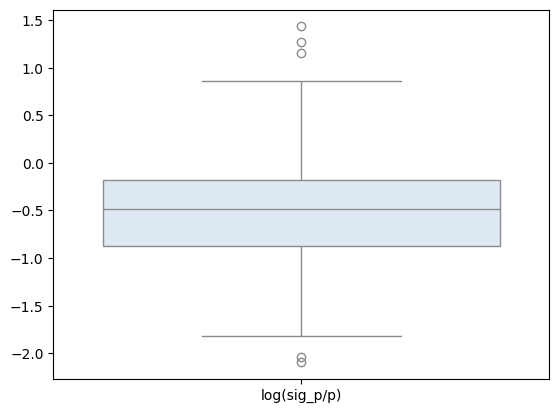

In [139]:
sns.boxplot(data=tab[["log(sig_p/p)"]].to_pandas())

In [135]:
tab["e_p_rel"]

<MaskedQuantity [7.44267446e-01, 9.02696184e-01, 1.27397068e-01,
                 5.97691562e-01, 2.59417532e-01, 1.18445911e+00,
                 1.75273713e+00, 1.43598829e+01, 6.00310832e-01,
                 1.81815295e-01, 1.32138865e+00, 3.30728062e-01,
                 6.26297599e-02, 1.91618346e-01, 3.79733634e-01,
                 8.33605887e-01, 6.50018372e-01, 6.15458216e-01,
                 1.58577267e-01, 1.77653682e+00, 4.78179823e-01,
                 3.40419835e-01, 2.52336242e+00, 3.87734100e-01,
                 3.05517891e-01, 3.01472987e+00, 7.83095964e-01,
                 1.14080818e+00, 1.02112636e+00, 7.86164010e-01,
                 9.92839108e-01, 6.29997394e-01, 2.30109319e-01,
                 9.78919902e-01, 4.31070642e-01, 5.18482210e-01,
                 2.34266516e+00, 1.44123582e+00, 1.17817714e+00,
                 1.91914142e-01, 3.27664914e-01, 1.40797785e+00,
                 1.17610845e-01, 2.65113181e+00, 2.91717116e-01,
                 1.588750